<a href="https://colab.research.google.com/github/rapu34/A1project/blob/main/EDA_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [ ]:
log = pd.read_csv("/content/drive/MyDrive/A1project/log_csv.csv", encoding='UTF8')

In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [ ]:
log.isnull().sum()

Unnamed: 0              0
uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [ ]:
log = log.dropna(subset=['uid'])
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
log.isnull().sum()

Unnamed: 0              0
uid                     0
action_type             0
category1               0
category2               0
category3          766812
collect_time            0
geoip_city_name    398912
useragent_os            0
viewrate             2375
viewtime                0
dtype: int64

In [ ]:
log.action_type.value_counts()

View         4742714
Highlight     443100
Basket        166914
Copy          100588
SINF           19912
Name: action_type, dtype: int64

TypeError: ignored

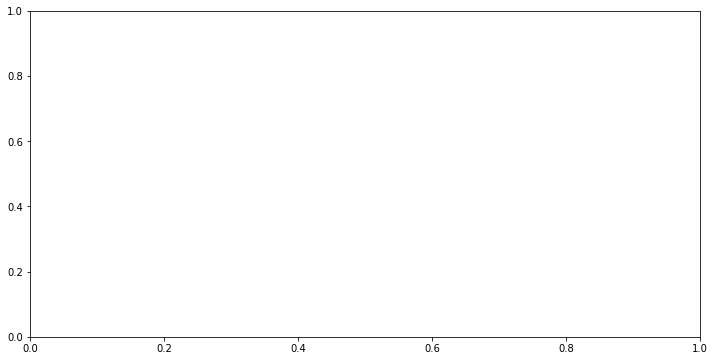

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data = log[['action_type'] ],  bins = 30,
                         multiple = 'stack', palette = 'Set2')
plt.show()